In [1]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:\\Users\\junge\\Desktop\\Python\\Lab_2\\Telecust1.csv')

# get rid of char table
df = df.drop('custcat', axis = 1)

In [3]:
df.columns, df.shape


(Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
        'employ', 'retire', 'gender', 'reside'],
       dtype='object'), (1000, 11))

In [4]:
df = df.fillna(df.mean())
df.head()

# ed - education group

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
0,2,13,44,64,1,9,4,5,0,0,2
1,3,11,33,136,1,7,5,5,0,0,6
2,3,68,52,116,1,24,1,29,0,1,2
3,2,33,33,33,0,12,2,0,0,1,1
4,2,23,30,30,1,9,1,2,0,0,4


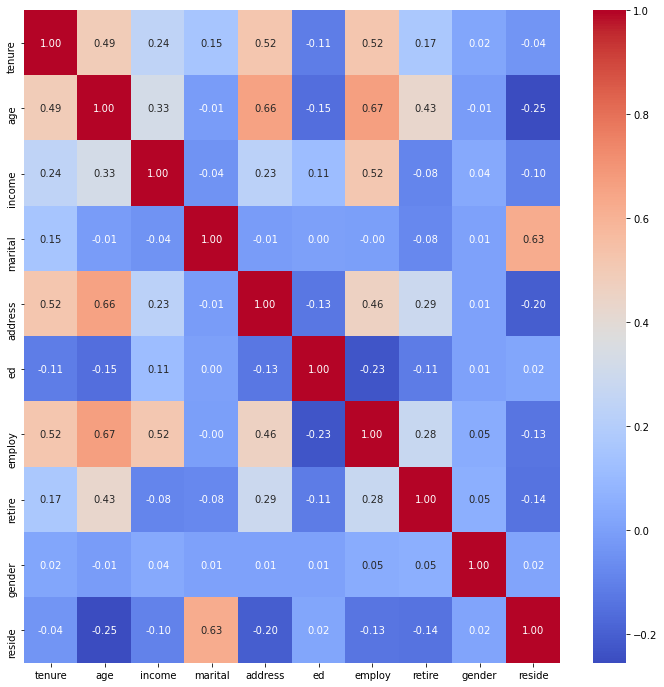

In [5]:
feature_columns = ['tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside']
corr = df[feature_columns].corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

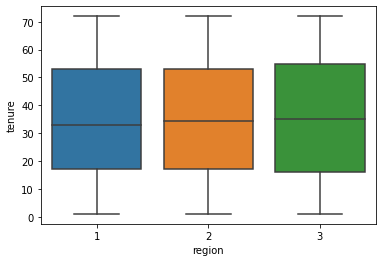

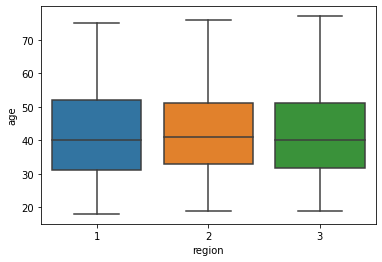

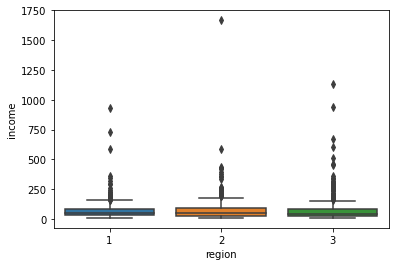

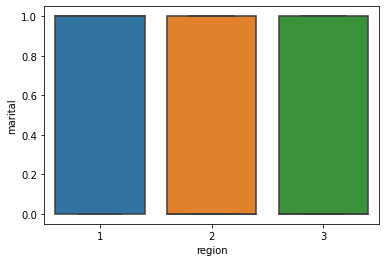

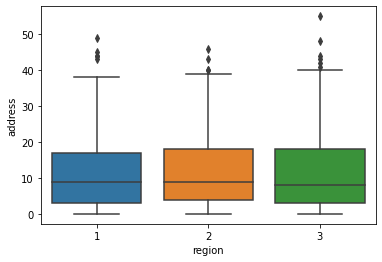

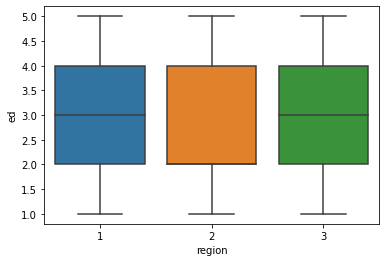

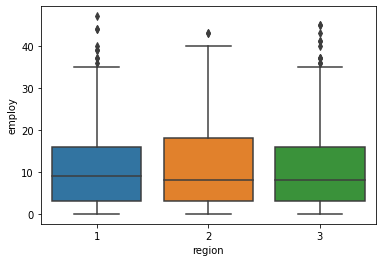

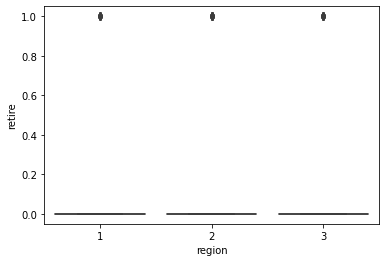

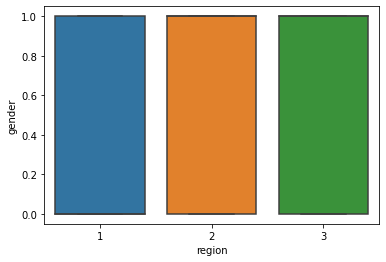

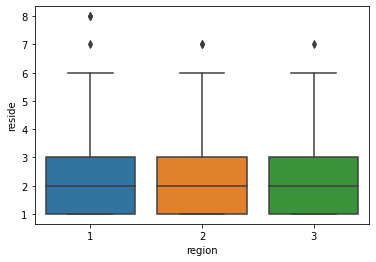

In [6]:
for entry in feature_columns:
    fig = plt.figure()
    ax = sns.boxplot(x="region", y=entry,data=df)

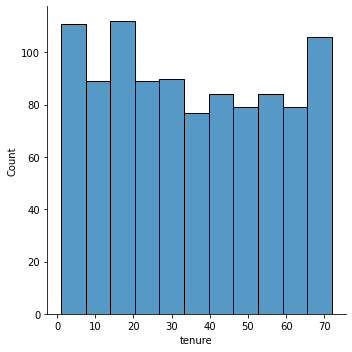

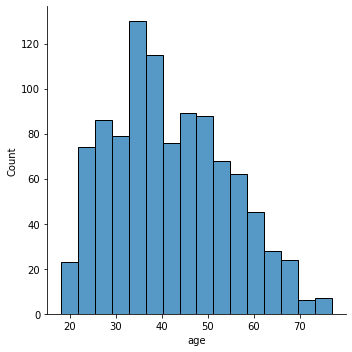

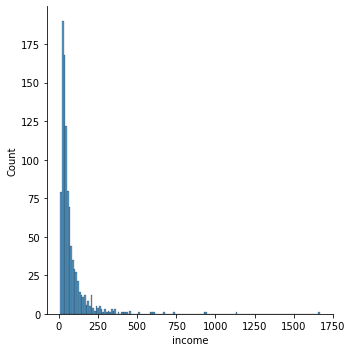

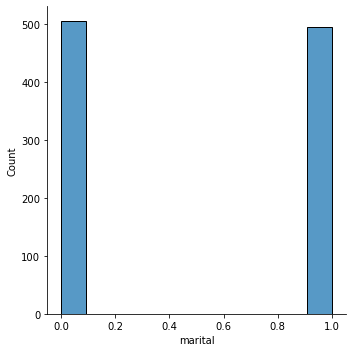

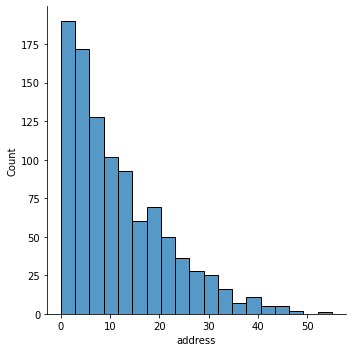

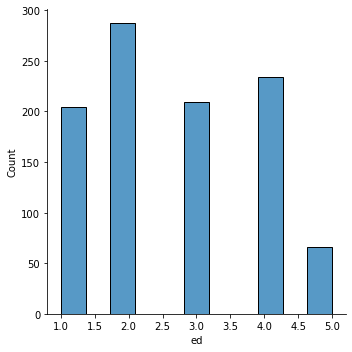

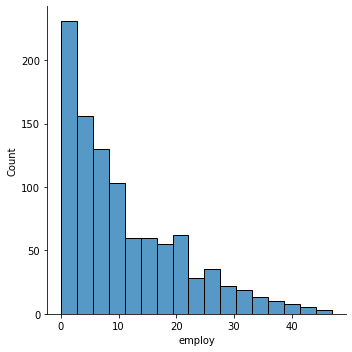

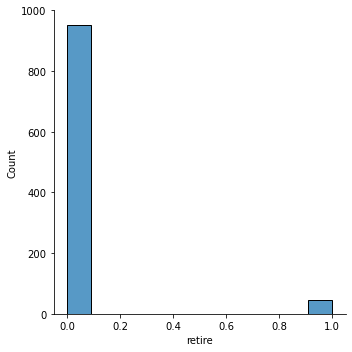

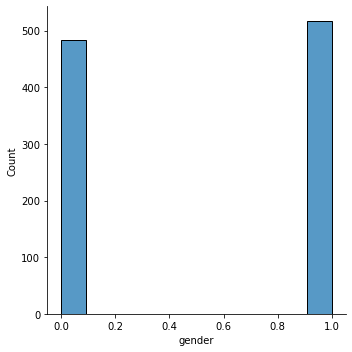

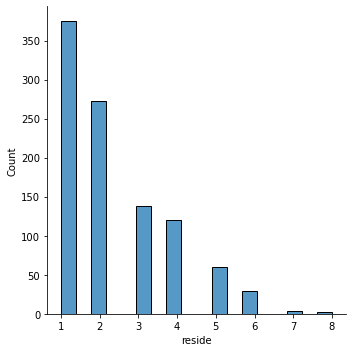

In [7]:
for entry in feature_columns: 
    sns.displot(df, x=entry)

## Splitting dataset to train/test

In [8]:
X = df.drop('region', axis = 1).values
y = df['region'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## ML models

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [11]:
grid_params = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,10,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, grid_params, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [12]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)
print('The grid_params combination that would give best accuracy is : ')
print(classifier_knn.best_params_)

Training set:  1.0
Test set:  0.36666666666666664
The grid_params combination that would give best accuracy is : 
{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}


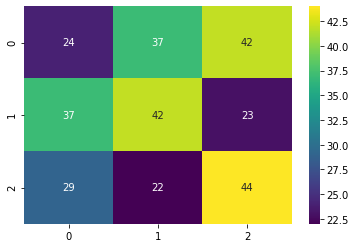

              precision    recall  f1-score   support

           1       0.27      0.23      0.25       103
           2       0.42      0.41      0.41       102
           3       0.40      0.46      0.43        95

    accuracy                           0.37       300
   macro avg       0.36      0.37      0.36       300
weighted avg       0.36      0.37      0.36       300



In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))

In [14]:
classifier_rf = RandomForestClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [15]:
grid_params =  { "model__n_estimators": [100,200,500,600],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth":[10,20],
                "model__min_samples_split": [2, 5, 10],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = GridSearchCV(rf_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

In [16]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.9714285714285714
Test set:  0.3466666666666667


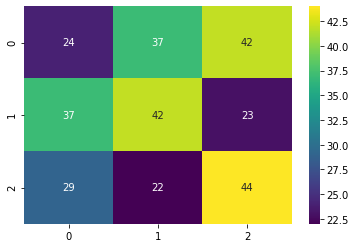

              precision    recall  f1-score   support

           1       0.27      0.23      0.25       103
           2       0.42      0.41      0.41       102
           3       0.40      0.46      0.43        95

    accuracy                           0.37       300
   macro avg       0.36      0.37      0.36       300
weighted avg       0.36      0.37      0.36       300

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}


In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))
print(classifier_knn.best_params_)

In [18]:
#Gradient Boost
classifier_gb = GradientBoostingClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', GradientBoostingClassifier())
]
gb_pipe = Pipeline(steps)

In [19]:
grid_params =  { "model__n_estimators": [100,200],
                "model__loss": ['deviance', 'exponential'],
                "model__learning_rate": [0.15],
                "model__max_features": ['auto', 'sqrt'],
                "model__criterion": ['friedman_mse', 'mse'],
                "model__random_state": [42] }
            
classifier_gb = GridSearchCV(gb_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_gb = classifier_gb.fit(X_train, y_train.ravel())

c:\users\junge\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.31573188 0.31571353 0.29567881 0.30712373        nan        nan
        nan        nan 0.31716249 0.31428292 0.29567881 0.30712373
        nan        nan        nan        nan]
  warnings.warn(


In [20]:
y_pred_gb_train = classifier_gb.predict(X_train)
accuracy_gb_train = accuracy_score(y_train, y_pred_gb_train)
print("Training set: ", accuracy_gb_train)
y_pred_gb_test = classifier_gb.predict(X_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)
print("Test set: ", accuracy_gb_test)

Training set:  0.8814285714285715
Test set:  0.35333333333333333


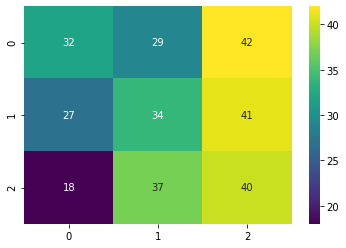

              precision    recall  f1-score   support

           1       0.42      0.31      0.36       103
           2       0.34      0.33      0.34       102
           3       0.33      0.42      0.37        95

    accuracy                           0.35       300
   macro avg       0.36      0.36      0.35       300
weighted avg       0.36      0.35      0.35       300

{'model__criterion': 'mse', 'model__learning_rate': 0.15, 'model__loss': 'deviance', 'model__max_features': 'auto', 'model__n_estimators': 100, 'model__random_state': 42}


In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_gb_test))
print(classifier_gb.best_params_)

In [22]:
classifier_ab = AdaBoostClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', AdaBoostClassifier())
]
ab_pipe = Pipeline(steps)

In [23]:
grid_params =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                "model__learning_rate":[0.5,1,2,3],
                "model__n_estimators": [50,100,150,200,300],
                "model__random_state" : [42] }

classifier_ab = GridSearchCV(ab_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_ab = classifier_ab.fit(X_train, y_train.ravel())

c:\users\junge\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.30424416 0.30994828 0.31139112 0.31426458 0.30994828 0.32140543
 0.30139516 0.31567685 0.30852378 0.30138293 0.33145642 0.33145642
 0.33145642 0.33145642 0.33145642 0.30573591 0.34288911 0.33854224
 0.36138929 0.31712581 0.33285646 0.32997689 0.32854627 0.32852793
 0.31995647 0.33135248 0.32567893 0.3270912  0.31567685 0.32136263
 0.30425027 0.31138501 0.3142279  0.30995439 0.29571549 0.31427681
 0.35854028 0.34145849 0.32992798        nan]
  warnings.warn(


In [28]:

from sklearn.metrics import accuracy_score

y_pred_ab_train = classifier_ab.predict(X_train)
accuracy_ab_train = accuracy_score(y_train, y_pred_ab_train)
print("Training set: ", accuracy_ab_train)
y_pred_ab_test = classifier_ab.predict(X_test)
accuracy_ab_test = accuracy_score(y_test, y_pred_ab_test)
print("Test set: ", accuracy_ab_test)

Training set:  0.3385714285714286
Test set:  0.2966666666666667


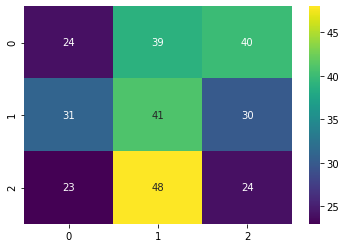

              precision    recall  f1-score   support

           1       0.31      0.23      0.27       103
           2       0.32      0.40      0.36       102
           3       0.26      0.25      0.25        95

    accuracy                           0.30       300
   macro avg       0.29      0.30      0.29       300
weighted avg       0.30      0.30      0.29       300

{'model__algorithm': 'SAMME.R', 'model__learning_rate': 3, 'model__n_estimators': 200, 'model__random_state': 42}


In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred_ab_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_ab_test))
print(classifier_ab.best_params_)

In [30]:
#Decision tree

classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [31]:
grid_params = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(dt_pipe,grid_params,cv = 3,n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [32]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.48428571428571426
Test set:  0.33666666666666667


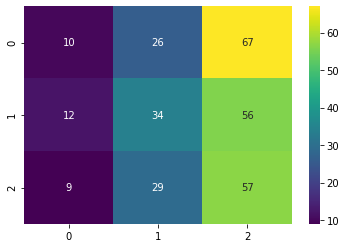

              precision    recall  f1-score   support

           1       0.32      0.10      0.15       103
           2       0.38      0.33      0.36       102
           3       0.32      0.60      0.41        95

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.31       300
weighted avg       0.34      0.34      0.30       300

{'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 8, 'model__random_state': 42}


In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_dt_test))
print(classifier_dt.best_params_)

In [34]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_pipe = Pipeline(steps)

In [35]:
#This part calculates too long time
grid_params = { 'model__kernel' : ['linear','rbf'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42],
               'model__gamma' : ['scale','auto']
}
classifier_svm = GridSearchCV(svm_pipe, grid_params, cv = 3)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())

In [36]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)
y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.38285714285714284
Test set:  0.34


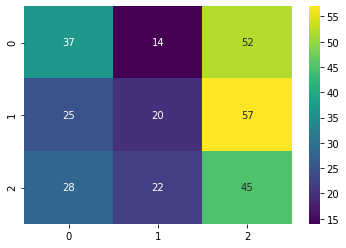

              precision    recall  f1-score   support

           1       0.41      0.36      0.38       103
           2       0.36      0.20      0.25       102
           3       0.29      0.47      0.36        95

    accuracy                           0.34       300
   macro avg       0.35      0.34      0.33       300
weighted avg       0.36      0.34      0.33       300

{'model__C': 10000, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__random_state': 42}


In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))
print(classifier_svm.best_params_)